In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

Defining paths

In [4]:
_root_dir = "../"
_data_dir = os.path.join(_root_dir, "data")
_logs_dir = os.path.join(_root_dir, "logs")
# filename = "3 Cabinets - BIRDTRACK FY19 - APR21.xlsx"
filename = "3 Cabinets - CASREP FY19 - APR21.xlsx"

In [5]:
df = pd.read_excel(
    os.path.join(
        _data_dir,
        filename
    ),
    sheet_name=0
)

df.head()

,COMMAND,TYCOM,REQUISITION,ENDUSER,STATUS_DATE,STATUS,ESD_SHIPPED,REMARKS,CASREP_NUMBER,CASREP_CATEGORY,...,BZ_RIC_TO,BV_DATE,BV_RIC_TO,BA_DATE,BA_RIC_TO,AS_DATE,AS_RIC_TO,AS_AT_DESTINATION_DATE,AS_AT_DESTINATION_RIC_TO,DELIVERY_ORDER
0,JOHN FINN,CNSP,R200100081W050,20010,2020-03-24 10:05:50,AS,2020-03-24 10:15:15,"MATL O/H UNIT LSR MANNY ANULAO, FFT TO UNIT. A...",20020,2,...,NaN,NaT,NaN,NaT,NaN,2020-03-23 08:34:01,SDX,2020-03-24 10:05:50,SDX,NaN
1,JOHN FINN,CNSP,R200100081W051,20010,2020-04-01 11:25:42,AS,2020-04-01 00:00:00,UNIT RECON,20020,2,...,NaN,NaT,NaN,2020-03-23 08:59:21,SDX,2020-03-24 11:34:31,SDX,2020-03-25 10:42:39,SDX,NaN
2,JOHN FINN,CNSP,R200100087W054,20010,2020-04-21 04:36:55,AS,2020-04-21 00:00:00,UNIT RECON,20023,2,...,NaN,NaT,NaN,NaT,NaN,2020-04-07 11:53:03,SDX,2020-04-13 10:34:42,SDX,NaN
3,JOHN FINN,CNSP,R200100130W072,20010,2020-05-14 10:43:33,AS,2020-05-14 00:00:00,MATL O/H DDDC SAN DIEGO FFT TO UNIT. AWAITING ...,20036,2,...,NaN,NaT,NaN,NaT,NaN,2020-05-13 08:53:02,SDX,2020-05-13 12:30:10,SDX,NaN
4,JOHN FINN,CNSP,R200100139W075,20010,2020-06-05 09:03:02,AS,2020-06-05 00:00:00,UNIT RECON,20036,2,...,NaN,NaT,NaN,2020-05-21 06:55:18,SDX,2020-05-21 07:14:04,SDX,2020-05-26 09:20:58,SDX,NaN


In [12]:
df['STATUS'].drop_duplicates().shape

(10,)

Text(0, 0.5, 'Status Codes')

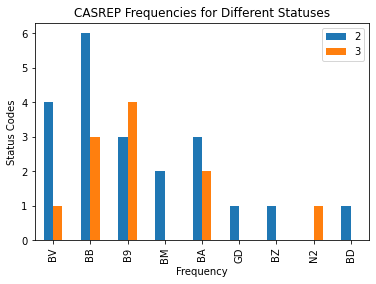

In [65]:
df['STATUS'].drop_duplicates()

df2 = df['CASREP_CATEGORY'][df['CASREP_CATEGORY'] == 2]
df3 = df['CASREP_CATEGORY'][df['CASREP_CATEGORY'] == 3]

(df2[df['STATUS'] == 'AS']).shape[0]

df4 = pd.DataFrame(
    {
        '2': [
              # (df2[df['STATUS'] == 'AS']).shape[0], 
              (df2[df['STATUS'] == 'BV']).shape[0],
              (df2[df['STATUS'] == 'BB']).shape[0],
              (df2[df['STATUS'] == 'B9']).shape[0],
              (df2[df['STATUS'] == 'BM']).shape[0],
              (df2[df['STATUS'] == 'BA']).shape[0],
              (df2[df['STATUS'] == 'GD']).shape[0],
              (df2[df['STATUS'] == 'BZ']).shape[0],
              (df2[df['STATUS'] == 'N2']).shape[0],
              (df2[df['STATUS'] == 'BD']).shape[0]],
        '3': [
              # (df3[df['STATUS'] == 'AS']).shape[0], 
              (df3[df['STATUS'] == 'BV']).shape[0],
              (df3[df['STATUS'] == 'BB']).shape[0],
              (df3[df['STATUS'] == 'B9']).shape[0],
              (df3[df['STATUS'] == 'BM']).shape[0],
              (df3[df['STATUS'] == 'BA']).shape[0],
              (df3[df['STATUS'] == 'GD']).shape[0],
              (df3[df['STATUS'] == 'BZ']).shape[0],
              (df3[df['STATUS'] == 'N2']).shape[0],
              (df3[df['STATUS'] == 'BD']).shape[0]]
    },
    index=df['STATUS'].drop_duplicates().values.tolist()[1:]
)

df4.plot(kind="bar")
plt.title("CASREP Frequencies for Different Statuses")
plt.xlabel("Frequency")
plt.ylabel("Status Codes")



# df['CASREP_CATEGORY'].value_counts()

In [6]:
df.corr()

,ENDUSER,CASREP_CATEGORY,FSC,QUANTITY,PRICE,NET_PRICE,ALTNSN,CCB_AMOUNT,DELIVERY_ORDER
ENDUSER,1.000000,0.008924,0.007116,-0.018344,0.114220,0.047255,NaN,NaN,NaN
CASREP_CATEGORY,0.008924,1.000000,-0.043321,0.042676,-0.026330,-0.045970,NaN,NaN,NaN
FSC,0.007116,-0.043321,1.000000,-0.003666,-0.251921,0.031744,NaN,NaN,NaN
QUANTITY,-0.018344,0.042676,-0.003666,1.000000,-0.090997,-0.097452,NaN,NaN,NaN
PRICE,0.114220,-0.026330,-0.251921,-0.090997,1.000000,0.644098,NaN,NaN,NaN
NET_PRICE,0.047255,-0.045970,0.031744,-0.097452,0.644098,1.000000,NaN,NaN,NaN
ALTNSN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCB_AMOUNT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DELIVERY_ORDER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Visualizing with Plotly Express

In [7]:
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [ ]:
px.scatter_matrix(
    df,
#     dimensions=["ENDUSER", "CASREP_CATEGORY", "FSC", "QUANTITY", "PRICE", "NET_PRICE"],
#     color="STATUS",
)

Visualizing with Seaborn

In [ ]:
import seaborn as sn

In [ ]:
sn.heatmap(df.corr(), annot=True)
plt.show()

In [14]:
df["NEW_COL"] = df["STATUS_DATE"] - df["ESD_SHIPPED"]

df.head()

,COMMAND,TYCOM,REQUISITION,ENDUSER,STATUS_DATE,STATUS,ESD_SHIPPED,REMARKS,CASREP_NUMBER,CASREP_CATEGORY,...,BV_DATE,BV_RIC_TO,BA_DATE,BA_RIC_TO,AS_DATE,AS_RIC_TO,AS_AT_DESTINATION_DATE,AS_AT_DESTINATION_RIC_TO,DELIVERY_ORDER,NEW_COL
0,JOHN FINN,CNSP,R200100081W050,20010,2020-03-24 10:05:50,AS,2020-03-24 10:15:15,"MATL O/H UNIT LSR MANNY ANULAO, FFT TO UNIT. A...",20020,2,...,NaT,NaN,NaT,NaN,2020-03-23 08:34:01,SDX,2020-03-24 10:05:50,SDX,NaN,-1 days +23:50:35
1,JOHN FINN,CNSP,R200100081W051,20010,2020-04-01 11:25:42,AS,2020-04-01 00:00:00,UNIT RECON,20020,2,...,NaT,NaN,2020-03-23 08:59:21,SDX,2020-03-24 11:34:31,SDX,2020-03-25 10:42:39,SDX,NaN,0 days 11:25:42
2,JOHN FINN,CNSP,R200100087W054,20010,2020-04-21 04:36:55,AS,2020-04-21 00:00:00,UNIT RECON,20023,2,...,NaT,NaN,NaT,NaN,2020-04-07 11:53:03,SDX,2020-04-13 10:34:42,SDX,NaN,0 days 04:36:55
3,JOHN FINN,CNSP,R200100130W072,20010,2020-05-14 10:43:33,AS,2020-05-14 00:00:00,MATL O/H DDDC SAN DIEGO FFT TO UNIT. AWAITING ...,20036,2,...,NaT,NaN,NaT,NaN,2020-05-13 08:53:02,SDX,2020-05-13 12:30:10,SDX,NaN,0 days 10:43:33
4,JOHN FINN,CNSP,R200100139W075,20010,2020-06-05 09:03:02,AS,2020-06-05 00:00:00,UNIT RECON,20036,2,...,NaT,NaN,2020-05-21 06:55:18,SDX,2020-05-21 07:14:04,SDX,2020-05-26 09:20:58,SDX,NaN,0 days 09:03:02


In [ ]:
df.columns

In [ ]:
from datetime import datetime

In [ ]:
(df["DATE_ORDERED"] - df["DATE_SHIPPED"]).plot.kde()

In [8]:
df.head()

,COMMAND,TYCOM,REQUISITION,ENDUSER,STATUS_DATE,STATUS,ESD_SHIPPED,REMARKS,CASREP_NUMBER,CASREP_CATEGORY,...,BZ_RIC_TO,BV_DATE,BV_RIC_TO,BA_DATE,BA_RIC_TO,AS_DATE,AS_RIC_TO,AS_AT_DESTINATION_DATE,AS_AT_DESTINATION_RIC_TO,DELIVERY_ORDER
0,JOHN FINN,CNSP,R200100081W050,20010,2020-03-24 10:05:50,AS,2020-03-24 10:15:15,"MATL O/H UNIT LSR MANNY ANULAO, FFT TO UNIT. A...",20020,2,...,NaN,NaT,NaN,NaT,NaN,2020-03-23 08:34:01,SDX,2020-03-24 10:05:50,SDX,NaN
1,JOHN FINN,CNSP,R200100081W051,20010,2020-04-01 11:25:42,AS,2020-04-01 00:00:00,UNIT RECON,20020,2,...,NaN,NaT,NaN,2020-03-23 08:59:21,SDX,2020-03-24 11:34:31,SDX,2020-03-25 10:42:39,SDX,NaN
2,JOHN FINN,CNSP,R200100087W054,20010,2020-04-21 04:36:55,AS,2020-04-21 00:00:00,UNIT RECON,20023,2,...,NaN,NaT,NaN,NaT,NaN,2020-04-07 11:53:03,SDX,2020-04-13 10:34:42,SDX,NaN
3,JOHN FINN,CNSP,R200100130W072,20010,2020-05-14 10:43:33,AS,2020-05-14 00:00:00,MATL O/H DDDC SAN DIEGO FFT TO UNIT. AWAITING ...,20036,2,...,NaN,NaT,NaN,NaT,NaN,2020-05-13 08:53:02,SDX,2020-05-13 12:30:10,SDX,NaN
4,JOHN FINN,CNSP,R200100139W075,20010,2020-06-05 09:03:02,AS,2020-06-05 00:00:00,UNIT RECON,20036,2,...,NaN,NaT,NaN,2020-05-21 06:55:18,SDX,2020-05-21 07:14:04,SDX,2020-05-26 09:20:58,SDX,NaN
